In [16]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

from dataset import load_hoda

In [4]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

In [5]:
y_train_original.shape

(1000,)

In [6]:
x_train_original.shape

(1000, 25)

In [7]:
y_train_original.max()+1

np.uint8(10)

In [30]:
y_train = keras.utils.to_categorical(y_train_original)
y_test = keras.utils.to_categorical(y_test_original)

In [31]:
y_train_original[:5]

array([6, 5, 0, 2, 7], dtype=uint8)

In [32]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

# نرمال سازی مقادیر به مقدار بین 0 و 1

In [33]:
x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')

x_train /= 255
x_test /= 255

In [12]:
# x_train[:5]
x_test[:5]

array([[0.        , 0.        , 0.        , 0.        , 1.        ,
        0.29803923, 0.        , 0.        , 0.14901961, 0.8509804 ,
        0.7490196 , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.8509804 , 0.6509804 , 0.        ,
        0.        , 0.54901963, 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.9372549 ,
        0.69803923, 1.        , 1.        , 0.03921569, 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.8980392 ,
        1.        , 0.4       , 0.8       , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.

 # تعریف معماری مدل - model architecture

In [40]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim= 25))
# model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,314 (9.04 KB)

 Trainable params: 2,314 (9.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compile Model

In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'rmsprop',
              metrics=['accuracy']
              )

In [44]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (1000, 25)
y_train shape: (1000, 10)


# Train model by train datasets

In [43]:
t_model = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1187 - loss: 2.3742 - val_accuracy: 0.2600 - val_loss: 2.1615
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2486 - loss: 2.1389 - val_accuracy: 0.4000 - val_loss: 1.9978
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3957 - loss: 1.9824 - val_accuracy: 0.5400 - val_loss: 1.8465
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5066 - loss: 1.8487 - val_accuracy: 0.6400 - val_loss: 1.6930
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6129 - loss: 1.6721 - val_accuracy: 0.7350 - val_loss: 1.5420
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6957 - loss: 1.5225 - val_accuracy: 0.7750 - val_loss: 1.3940
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7403 - loss: 1.3397 - val_accuracy: 0.7900 - val_loss: 1.2617
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7852 - loss: 1.2087 - val_accuracy: 0.8100 - 

In [46]:
import matplotlib.pyplot as plt 

In [50]:
t_model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

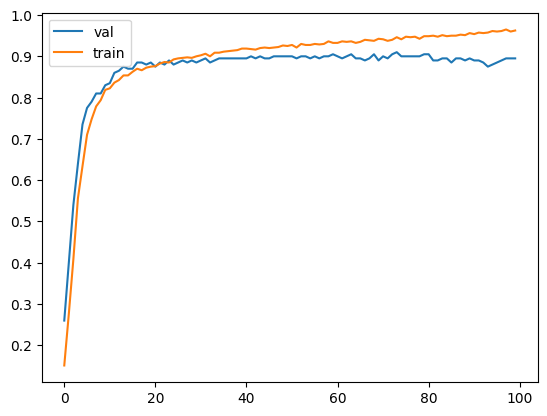

In [51]:
plt.plot(t_model.history['val_accuracy'])
plt.plot(t_model.history['accuracy'])
plt.legend(['val', 'train'])

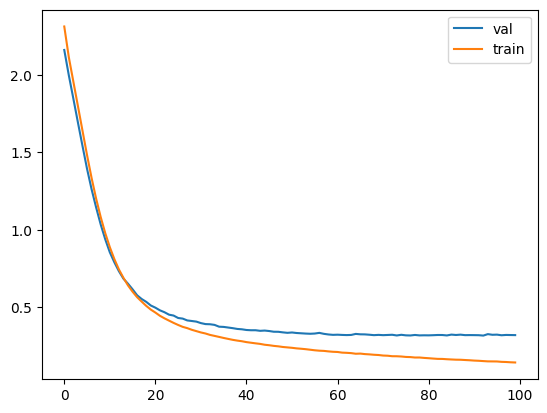

In [52]:
plt.plot(t_model.history['val_loss'])
plt.plot(t_model.history['loss'])
plt.legend(['val', 'train'])

# Model evaluation on test data

In [54]:
loss , accuracy = model.evaluate(x_test, y_test)
print('loss:', loss)
print('Accuracy:', accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9159 - loss: 0.2669
loss: 0.26997944712638855
Accuracy: 0.9150000214576721


# Predict result by model

In [66]:
# The predict_classes function outputs the highest probability class
# according on the trained classifier for each input example.
predicted= model.predict(x_test).argmax(axis=1)
print('Predicted:', predicted)
print('True Label:', y_test_original)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted: [7 2 3 8 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 2 5 5 8 9 6 5
 1 4 8 8 4 2 2 1 2 7 9 0 3 7 5 7 5 2 9 8 2 9 8 8 6 6 6 7 6 2 4 2 4 4 5 9 1
 8 4 0 5 6 2 4 6 2 7 7 7 7 1 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 9 5 2 9 0 4 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 0 7 6 5 4 4 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 3 4 1 3 3 1
 1 3 3 8 9 6 7 7 2 3 0 1 4 9 5]
True Label: [7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


In [67]:
predicted == y_test_original

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [68]:
np.mean(predicted == y_test_original)


np.float64(0.915)

In [70]:
import tensorflow as tf
conf_matrix = tf.math.confusion_matrix(
    labels=y_test_original,
    predictions=predicted,
    num_classes=10
)
print(conf_matrix.numpy())

[[14  0  0  0  0  1  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  1  0]
 [ 0  1 21  0  1  0  0  0  0  0]
 [ 0  0  1 20  0  0  1  1  0  1]
 [ 0  0  0  0 15  1  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  1  0  0  0 14  1  0  1]
 [ 0  0  3  1  1  0  0 25  0  0]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0 25]]


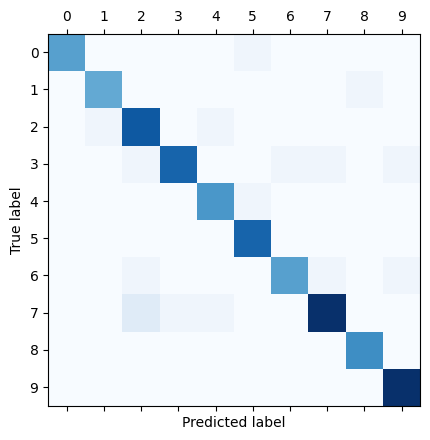

In [71]:
plt.matshow(conf_matrix, cmap='Blues')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label');